Utilize the medicare and medicard services to predict the hospital costs per patient with SageMaker Autopilot

In [ ]:
The dataset has been captured from the data source - https://data.medicare.gov/api/views/nrth-mfg3/rows.csv?accessType=DOWNLOAD

In [1]:
#Upgrading the Sagemaker and Jupyter lab 
!pip install sagemaker --upgrade
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!pip install Iprogress
!pip install --upgrade jupyterlab

Requirement already up-to-date: sagemaker in /usr/local/lib/python3.6/dist-packages (2.16.1)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Requirement already up-to-date: jupyterlab in /usr/local/lib/python3.6/dist-packages (2.2.9)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
#Pip installs
!pip install matplotlib
!pip install seaborn
!pip install wget
!pip install sagemaker --upgrade

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Requirement already up-to-date: sagemaker in /usr/local/lib/python3.6/dist-packages (2.16.1)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
#importing the packages that are needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split

In [4]:
#Downloading the dataset 
!wget -O Medicare_Hospital_Spending_by_Claim.csv https://data.medicare.gov/api/views/nrth-mfg3/rows.csv?accessType=DOWNLOAD
dataset = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')
dataset.head()


,Facility ID,Facility Name,State,Period,Claim Type,Avg Spending Per Episode Hospital,Avg Spending Per Episode State,Avg Spending Per Episode Nation,Percent of Spending Hospital,Percent of Spending State,Percent of Spending Nation,Start Date,End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Home Health Agency,21,16,13,0.09%,0.08%,0.06%,01/01/2018,12/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Hospice,2,1,1,0.01%,0.00%,0.00%,01/01/2018,12/31/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Inpatient,6,7,7,0.03%,0.04%,0.03%,01/01/2018,12/31/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Outpatient,219,108,152,0.95%,0.52%,0.70%,01/01/2018,12/31/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1 to 3 days Prior to Index Hospital Admission,Skilled Nursing Facility,1,2,2,0.00%,0.01%,0.01%,01/01/2018,12/31/2018


In [6]:
#Transforming the data
#converting all the data types
dataset1 = dataset
dataset1['Percent of Spending Nation'] = dataset1['Percent of Spending Nation'].str.rstrip('%').astype('float')
dataset1['Percent of Spending Nation'] = dataset1['Percent of Spending Nation']/100
dataset1['Percent of Spending Hospital'] = dataset1['Percent of Spending Hospital'].str.rstrip('%').astype('float')
dataset1['Percent of Spending Hospital'] = dataset1['Percent of Spending Hospital']/100
dataset1['Percent of Spending State'] = dataset1['Percent of Spending State'].str.rstrip('%').astype('float')
dataset1['Percent of Spending State'] = dataset1['Percent of Spending State']/100
dataset1['Avg Spending Per Episode Hospital'] = dataset1['Avg Spending Per Episode Hospital'].astype('float')
dataset1['Avg Spending Per Episode State'] = dataset1['Avg Spending Per Episode State'].astype('float')
dataset1['Avg Spending Per Episode Nation'] = dataset1['Avg Spending Per Episode Nation'].astype('float')
col_name='Avg Spending Per Episode Hospital'



Facility Name


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

col_0,% of observations
Facility Name,
ABBEVILLE GENERAL HOSPITAL,0.000324
ABBOTT NORTHWESTERN HOSPITAL,0.000324
ABILENE REGIONAL MEDICAL CENTER,0.000324
ABINGTON HEALTH LANSDALE HOSPITAL,0.000324
ABINGTON MEMORIAL HOSPITAL,0.000324
...,...
YORK HOSPITAL,0.000649
YUKON KUSKOKWIM DELTA REG HOSPITAL,0.000324
YUMA REGIONAL MEDICAL CENTER,0.000324


State


col_0,% of observations
State,
AK,0.002595
AL,0.026273
AR,0.014272
AZ,0.018813
CA,0.093091
CO,0.014921
CT,0.009082
DC,0.001946
DE,0.001946


Period


col_0,% of observations
Period,
1 through 30 days After Discharge from Index Hospital Admission,0.318182
1 to 3 days Prior to Index Hospital Admission,0.318182
Complete Episode,0.045455
During Index Hospital Admission,0.318182


Claim Type


col_0,% of observations
Claim Type,
Carrier,0.136364
Durable Medical Equipment,0.136364
Home Health Agency,0.136364
Hospice,0.136364
Inpatient,0.136364
Outpatient,0.136364
Skilled Nursing Facility,0.136364
Total,0.045455


Start Date


col_0,% of observations
Start Date,
01/01/2018,1.0


End Date


col_0,% of observations
End Date,
12/31/2018,1.0


Facility ID                          0
Facility Name                        0
State                                0
Period                               0
Claim Type                           0
Avg Spending Per Episode Hospital    0
Avg Spending Per Episode State       0
Avg Spending Per Episode Nation      0
Percent of Spending Hospital         0
Percent of Spending State            0
Percent of Spending Nation           0
Start Date                           0
End Date                             0
dtype: int64

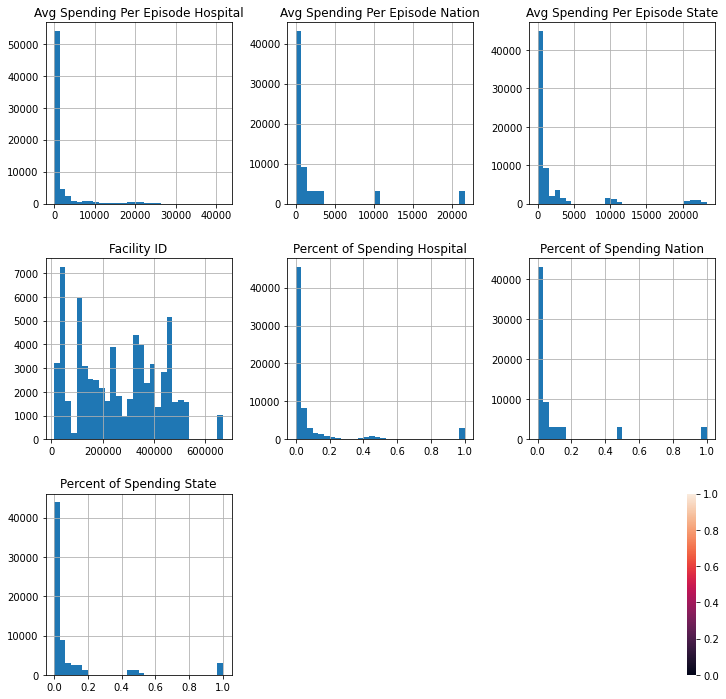

In [8]:
#Exploratory anaysis
dataset.describe()
dataset.dtypes
%matplotlib inline
hist = dataset.hist(bins = 30 , figsize =(12,12))
for column in dataset1.select_dtypes(include=['object']).columns:
    print(column)
    display(pd.crosstab(index=dataset1[column],columns= '% of observations', normalize = 'columns'))
seaborn.heatmap(dataset1.corr())
dataset1.corr()
dataset1.isna().sum() #Not needed as AutoML does that 
#Not needed as AutoML can take care of the categorical data
#encoding the categorical datasets 
# Encode column "State"

#replace_map = {'State': {'AK': 1, 'AL': 2, 'AR': 3, 'AZ': 4, 'CA': 5, 'CO': 6, 'CT': 7, 
#                         'DC': 8, 'DE': 9, 'FL': 10, 'GA': 11, 'HI': 12, 
#                         'IA': 13, 'ID': 14, 'IL': 15, 'IN': 16, 'KS': 17, 
#                         'KY': 18, 'LA': 19, 'MA': 20, 'ME': 21, 'MI': 22, 
#                         'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 
#                        'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 
#                         'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 
#                         'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 
#                         'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 
#                        'WI': 48, 'WV': 49, 'WY': 50}}
#dataset1.replace(replace_map,inplace=True)

# Encode column "Period"

#replace_map = {'Period': {'1 to 3 days Prior to Index Hospital Admission': 1, 
#                         'During Index Hospital Admission': 2, 
#                          '1 through 30 days After Discharge from Index Hospital Admission': 3, 
#                          'Complete Episode': 4}}
#dataset1.replace(replace_map,inplace=True)

# Encode column "Claim Type"

#replace_map = {'Claim Type': {'Home Health Agency': 1, 
#                             'Hospice': 2, 
#                             'Inpatient': 3, 
#                              'Outpatient': 4, 
#                              'Skilled Nursing Facility': 5, 
#                              'Durable Medical Equipment': 6, 
#                             'Carrier': 7, 
#                              'Total': 8}}
#dataset1.replace(replace_map,inplace=True)


In [10]:
#Preparing data for model creation
col_name='Avg Spending Per Episode Hospital'
first_col = dataset1.pop(col_name)
dataset1.insert(0, col_name, first_col)
dataset2 = dataset1.drop('Start Date',axis = 1)
dataset2 = dataset2.drop('End Date',axis =1 )
df = dataset2.sample(frac=1)
train, test = train_test_split(df, test_size=0.2)
local_train_file = 'train_set.csv'

train.to_csv(local_train_file, index=False, header=True)
test.to_csv('test_set.csv', index=False, header=True)

In [ ]:
#sagemaker Autopilot
from sagemaker import AutoML
from time import gmtime, strftime, sleep
import numpy as np
import sagemaker

sess = sagemaker.Session()

role = sagemaker.get_execution_role()

#timestamp_suffix = strftime('%d-%H-%M-%S', gmtime())
#timestamp_suffix = strftime('%d-%H', gmtime())
base_job_name = 'CostPrediction3' 

target_attribute_name = 'Avg Spending Per Episode Hospital'
target_attribute_values = np.unique(train[target_attribute_name])
target_attribute_true_value = target_attribute_values[1] # 'True.'

automl = AutoML(role=role,
                target_attribute_name=target_attribute_name,
                base_job_name=base_job_name,
                sagemaker_session=sess,
                max_candidates=20,
               problem_type = 'Regression',
                job_objective = {'MetricName':'MSE'})

automl.fit(local_train_file, job_name=base_job_name, wait=True, logs=True)

.......................................................................

In [ ]:
#deploying the ML Model 
from datetime import datetime
from sagemaker import AutoML
import sagemaker
import numpy as np

sess = sagemaker.Session()

# if you needed to restart you kernel, you can attach your AutoML job here
automl_job_name = 'CostPrediction3' #<== REPLACE THIS WITH YOUR OWN AUTOML JOB NAME
automl = AutoML.attach(automl_job_name, sagemaker_session=sess)

ep_name = 'automl-endpoint-' + datetime.now().strftime('%S')

inference_response_keys = ['predicted_label', 'probability']

# Create the inference endpoint
automl.deploy(1, 'ml.m5.xlarge', endpoint_name = ep_name) #inference_response_keys=inference_response_keys)

In [ ]:
from sagemaker.predictor import Predictor
class AutomlEstimator:
    def __init__(self, endpoint_name, sagemaker_session):
        self.predictor = Predictor(
            endpoint_name=endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=sagemaker.serializers.CSVSerializer(),
            #content_type='text/csv',
            #accept='text/csv'
        )
    # Prediction function for regression
    def predict(self, x):
        response = self.predictor.predict(x)
        return np.array([float(x) for x in response.decode('utf-8').split(',')])
# make sure this is pointing to the right endpoint name - if you reran that cell above you may have overwitten the variable in memory
automl_estimator = AutomlEstimator(endpoint_name=ep_name, sagemaker_session=sess)

In [ ]:
# Running the model on the test data 
import pandas as pd

test_data = pd.read_csv('test_set.csv')

In [ ]:
#Deployment 
#Autoscaling 

In [ ]:
#Enabling autoscaling 
import boto3

def get_resource_id(endpoint_name):

    client = boto3.client('sagemaker')

    response = client.describe_endpoint(
        EndpointName=endpoint_name)

    variant_name = response['ProductionVariants'][0]['VariantName']
    resource_id = 'endpoint/{}/variant/{}'.format(endpoint_name, variant_name)
    
    return resource_id

resource_id = get_resource_id(ep_name)


In [ ]:
import boto3

role = sagemaker.get_execution_role()

def set_scaling_policy(resource_id, min_capacity = 1, max_capacity = 8, role = role):

    scaling_client = boto3.client('application-autoscaling')

    response = scaling_client.register_scalable_target(
        ServiceNamespace='sagemaker',
        ResourceId=resource_id,
        ScalableDimension='sagemaker:variant:DesiredInstanceCount',
        MinCapacity=min_capacity,
        MaxCapacity=max_capacity,
        RoleARN=role)
    
    return response

res = set_scaling_policy(resource_id)

In [ ]:
#Setting up the monitoring 
import sagemaker
import os

sess = sagemaker.Session()

bucket = sess.default_bucket()

prefix = 'model-hosting'

s3_capture_upload_path =  's3://{}/{}/model-monitor'.format(bucket, prefix)

print ('about to set up monitoring for endpoint named {}'.format(ep_name))

In [ ]:
from sagemaker.model_monitor import DataCaptureConfig

data_capture_config = DataCaptureConfig(
                        enable_capture = True,
                        sampling_percentage=50,
                        destination_s3_uri=s3_capture_upload_path,
                        capture_options=["REQUEST", "RESPONSE"],
                        csv_content_types=["text/csv"],
                        json_content_types=["application/json"])

# Now it is time to apply the new configuration and wait for it to be applied
automl_estimator.predictor.update_data_capture_config(data_capture_config=data_capture_config)

sess.wait_for_endpoint(endpoint=ep_name)

In [ ]:
msg = 'aws s3 cp train_set.csv s3://{}/{}/train/'.format(bucket, prefix)
os.system(msg)

In [ ]:
# todo - show them how to get access to this training data
s3_training_data_path = 's3://sagemaker-us-east-1-957287900609/auto-ml-input-data/'.format(bucket, prefix)

s3_baseline_results =  's3://{}/{}/model-monitor/baseline-results'.format(bucket, prefix)

In [ ]:
from sagemaker.model_monitor import DefaultModelMonitor
from sagemaker.model_monitor.dataset_format import DatasetFormat

my_default_monitor = DefaultModelMonitor(
    role=role,
    instance_count=1,
    instance_type='ml.m5.xlarge',
    volume_size_in_gb=20,
    max_runtime_in_seconds=3600,
)

my_default_monitor.suggest_baseline(
    baseline_dataset=s3_training_data_path,
    
    # change header to false if not included
    dataset_format=DatasetFormat.csv(header=False),
    output_s3_uri=s3_baseline_results,
    wait=True
)

In [ ]:
from sagemaker.model_monitor import CronExpressionGenerator
from time import gmtime, strftime

mon_schedule_name = 'bi-hourly'
s3_report_path = 's3://{}/{}/model-monitor/monitoring-job-results'.format(bucket, prefix)

my_default_monitor.create_monitoring_schedule(
    monitor_schedule_name=mon_schedule_name,
    endpoint_input=ep_name,
    output_s3_uri=s3_report_path,
    statistics=my_default_monitor.baseline_statistics(),
    constraints=my_default_monitor.suggested_constraints(),
    schedule_cron_expression=CronExpressionGenerator.daily(),
    enable_cloudwatch_metrics=True)

In [ ]:
#Visualzing the feature importance by Shap 
import shap

from shap import KernelExplainer
from shap import sample
from scipy.special import expit

# Initialize plugin to make plots interactive.
shap.initjs()

In [ ]:
data_without_target = test_data.drop(columns=['Avg Spending Per Episode Hospital'])

background_data = sample(data_without_target, 50)
background_data .shape

In [ ]:
problem_type = automl.describe_auto_ml_job(job_name=automl_job_name)['ResolvedAttributes']['ProblemType'] 
link = "identity" if problem_type == 'Regression' else "logit" 
#sagemaker.__version__# the handle to predict_proba is passed to KernelExplainerWrapper since KernelSHAP requires the class probability
explainer = KernelExplainer(automl_estimator.predict, background_data, link=link)

In [ ]:
%%writefile managed_endpoint.py

import boto3
region = boto3.Session().region_name

sm = boto3.Session().client(service_name='sagemaker',region_name=region)

class ManagedEndpoint:
    def __init__(self, ep_name, auto_delete=False):
        self.name = ep_name
        self.auto_delete = auto_delete
        
    def __enter__(self):
        endpoint_description = sm.describe_endpoint(EndpointName=self.name)
        if endpoint_description['EndpointStatus'] == 'InService':
            self.in_service = True        

    def __exit__(self, type, value, traceback):
        if self.in_service and self.auto_delete:
            print("Deleting the endpoint: {}".format(self.name))            
            sm.delete_endpoint(EndpointName=self.name)
            sm.get_waiter('endpoint_deleted').wait(EndpointName=self.name)
            self.in_service = False

In [ ]:
# Get the first sample
x = data_without_target.iloc[0:1]

# ManagedEndpoint can optionally auto delete the endpoint after calculating the SHAP values. To enable auto delete, use ManagedEndpoint(ep_name, auto_delete=True)
from managed_endpoint import ManagedEndpoint
with ManagedEndpoint(ep_name) as mep:
    shap_values = explainer.shap_values(x, nsamples='auto', l1_reg='aic')

In [ ]:
#Plots with Shap 
x = data_without_target.iloc[0:1]
#shap.summary_plot(explainer.expected_value, shap_values, x)
shap.force_plot(explainer.expected_value, shap_values, x, link=link)

In [ ]:
with ManagedEndpoint(ep_name) as mep:
    shap_values = explainer.shap_values(x, nsamples='auto', l1_reg='num_features(5)')
shap.force_plot(explainer.expected_value, shap_values, x, link=link)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X, link=link)

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")